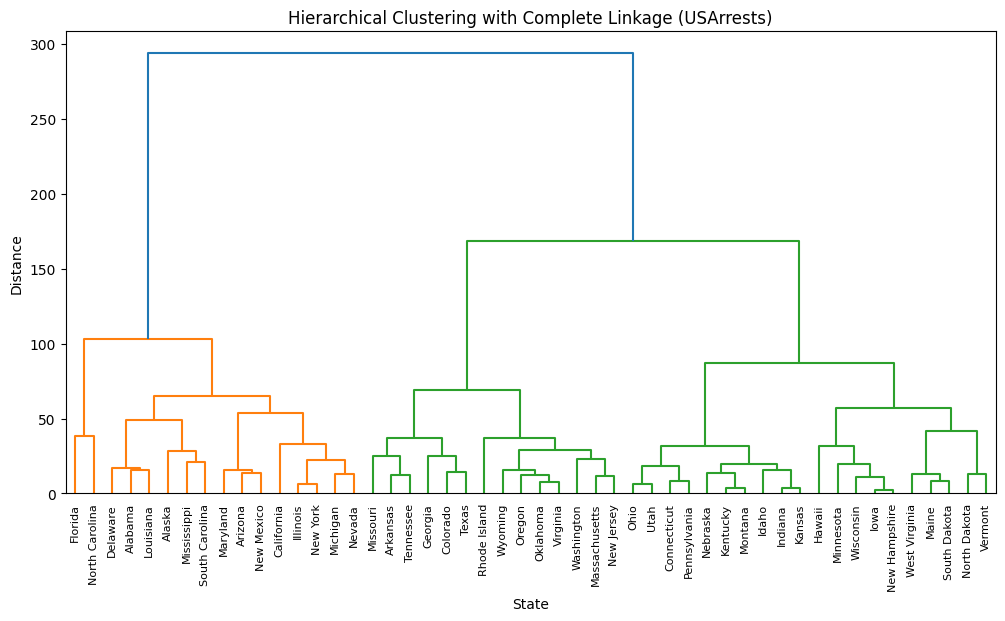

In [8]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
import pandas as pd

USArrests = get_rdataset('USArrests').data

Z = linkage(USArrests, method="complete", metric="euclidean")

plt.figure(figsize=(12, 6))
dendrogram(Z, labels=USArrests.index.tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering with Complete Linkage (USArrests)")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()


In [10]:
clusters = fcluster(Z, t=3, criterion="maxclust")

cluster_assignments = pd.DataFrame({
    "State": USArrests.index,
    "Cluster": clusters
}).sort_values("Cluster").reset_index(drop=True)

cluster_assignments.head()


,State,Cluster
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,California,1
4,Delaware,1


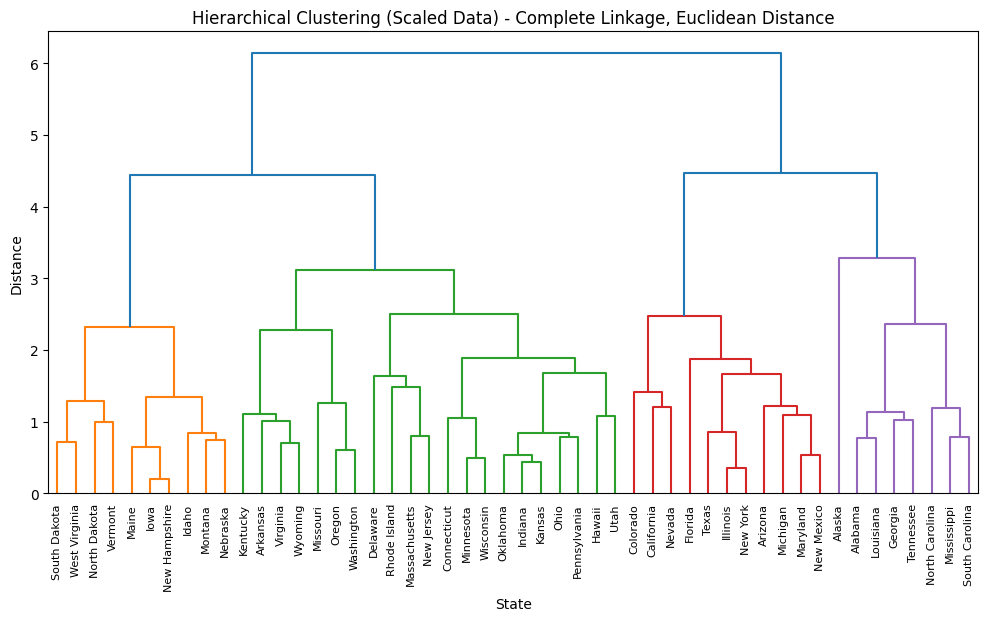

In [11]:
scaler = StandardScaler()
USArrests_scaled = scaler.fit_transform(USArrests)

Z_scaled = linkage(USArrests_scaled, method="complete", metric="euclidean")

plt.figure(figsize=(12, 6))
dendrogram(Z_scaled, labels=USArrests.index.tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering (Scaled Data) - Complete Linkage, Euclidean Distance")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()

When the variables are not scaled, those with larger variances (in the **USArrests** data, the *Assault* variable dominates because its values are much larger than the others) heavily influence the Euclidean distances. As a result, the clustering tends to reflect primarily differences in *Assault* rates, while contributions from *Murder*, *UrbanPop*, and *Rape* are minimized. After scaling each variable to have standard deviation one, all four variables contribute equally to the distance metric, and the resulting clusters reflect a more balanced combination of the crime statistics. In practice, it is usually appropriate to scale the variables before computing inter-observation dissimilarities, especially when the features are measured in different units or have widely different variances, to prevent one variable from dominating the clustering structure.